# Supplementary Practice Problems

These are similar to programming problems you may encounter in the mid-terms. They are not graded but we will review them in lab sessions.

**1**. (10 points) The logistic map is defined by the following simple function

$$
f(x) = rx(1-x)
$$

For $x_0 = 0.1$ and $r = 4.0$, store the first 10 values of the iterated logistic map $x_{i+1} = rx_i(1-x_i)$ in a list. The first value in the list should be $x_0$.

In [1]:
r = 4.0
vals = [0.1]
for i in range(9):
    vals.append(r*vals[-1]*(1-vals[-1]))
vals

[0.1,
 0.36000000000000004,
 0.9216,
 0.28901376000000006,
 0.8219392261226498,
 0.5854205387341974,
 0.970813326249438,
 0.11333924730376121,
 0.4019738492975123,
 0.9615634951138128]

**2**. (10 points) Write a function to find the greatest common divisor (GCD) of 2 numbers using Euclid's algorithm.:

\begin{align}
\gcd(a,0) &= a \\
\gcd(a, b) &= \gcd(b, a \mod b)
\end{align}

Find the GCD of 5797 and 190978. 

Now write a function to find the GCD given a collection of numbers.

Find the GCD of (24, 48, 60, 120, 8).

In [74]:
def GCD(a,b):
    if b == 0:
        return a
    return GCD(b, a%b)

# def GCD_group(nums):
#     if len(nums) == 1:
#         return nums[0]
#     a,b = nums[:2]
#     for num in nums[2:]:
#         a,b = GCD(a,b),num
#     return GCD(a,b)
from functools import reduce
def GCD_group(nums):
    return reduce(GCD, nums)

In [75]:
GCD(5797, 190978)

17

In [76]:
GCD_group((24, 48, 60, 120, 8))

4

**3**. (10 points) Find the least squares linear solution to the following data

```
y = [1,2,3,4]
x1 = [1,2,3,4]
x2 = [2,3,4,5]
```

That is, find the "best" intercept and slope for the variables `x1` and `x2`.

In [12]:
import numpy as np
from scipy.linalg import lstsq
y = np.array([1,2,3,4])
x1 = np.array([1,2,3,4])
x2 = np.array([2,3,4,5])
M = np.c_[x1,x2,[1]*4]
w,res,_,s = lstsq(M, y)
w

array([ 0.66666667,  0.33333333, -0.33333333])

**4**. (10 points) Read the `mtcars` data frame from R to a `pandas` DataFrame. Find the mean `wt` and `mpg` for all cars grouped by the number of `gear`s.

In [16]:
%load_ext rpy2.ipython

In [20]:
mtcars = %R mtcars
mtcars.groupby('gear')[['wt','mpg']].agg('mean')

,wt,mpg
gear,,
3.0,3.892600,16.106667
4.0,2.616667,24.533333
5.0,2.632600,21.380000


**5**. (10 points) Read the `iris` data frame from R to a `pandas` DataFrame. Make a `seaborn` plot showing a linear regression of `Petal.Length` (y) against `Sepal.Length` (x). Make a separate regression line for each `Species`.

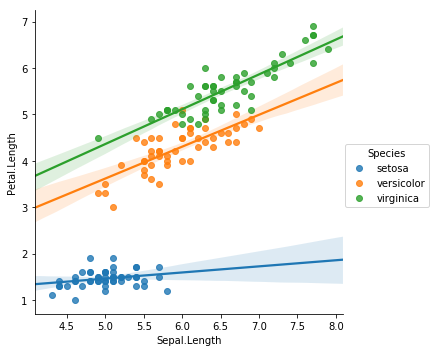

In [80]:
%R -o iris
%matplotlib inline
import seaborn as sns
sns.lmplot(x='Sepal.Length' , y='Petal.Length' , hue='Species' , data=iris)

**6**. (10 points) Write a function that can flatten a nested list of arbitrary depth. Check that

```python
flatten([1,[2,3],[4,[5,[6,7],8],9],10,[11,12]])
```

returns

```python
[1,2,3,4,5,6,7,8,9,10,11,12]
```

For simplicity, assume that the only data structure you will encounter is a list. You can check if an item is a list by using 

```python
isinstance(item, list)
```

In [82]:
# def flatten(nested_list):
#     flat_list = []
#     for item in nested_list:
#         if isinstance(item, list):
#             flat_list.extend(flatten(item))
#         else:
#             flat_list.append(item)
#     return flat_list

def flatten(nested_list, flat=[]):
    if isinstance(nested_list,list):
        for item in nested_list:
            flatten(item)
    else:
        flat.append(nested_list)
    return flat

flatten([1,[2,3],[4,[5,[6,7],8],9],10,[11,12]])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

**7**. (10 points) Create the following table

```python
array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1,   0],
       [  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]])
```

Start with the first row

```
[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
```

and build the subsequent rows using a simple rule that only depends on the previous row.

In [38]:
prev = np.array([ 1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype='int')
complete = prev.reshape(1,-1)
for i in range(len(prev)-1):
    new = prev + np.r_[0, prev[:-1]]
    complete = np.r_[complete, new[None,:]]
    prev = new
complete

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1,   0],
       [  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]])

**8**. (10 points) Read the following data sets into DataFrames. 

- url1 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills.csv"
- url2 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills2000.csv"

Create a new DataFraem only containing the names present in both DataFrames. Drop the `timef` column and have a single column for `dist` , `climb` and `time` that shows the average value of the two DataFrames. The final DtataFrame will thus have 4 columns (name, dist, climb, time).

In [45]:
import pandas as pd
df1 = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills.csv")
df2 = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills2000.csv")

In [72]:
complete = pd.merge(df1, df2, on='Unnamed: 0')
complete = complete.drop('timef',axis=1)
complete['dist'] = complete[['dist_x','dist_y']].mean(axis=1)
complete['climb'] = complete[['climb_x','climb_y']].mean(axis=1)
complete['time'] = complete[['time_x','time_y']].mean(axis=1)
complete = complete.drop(['dist_x','dist_y','climb_x','climb_y','time_x','time_y'],axis=1)

In [73]:
complete

,Unnamed: 0,dist,climb,time
0,Craig Dunain,6.00,900.0,17.098056
1,Ben Lomond,8.50,3131.0,31.652389
2,Goatfell,8.00,2866.0,37.222389
3,Scolty,5.00,800.0,15.122917
4,Traprain,6.25,650.0,20.186944
5,Dollar,5.50,2000.0,21.844167
6,Lomonds,9.25,2200.0,33.026528
7,Black Hill,4.25,800.0,8.932389
8,Meall Ant-Suidhe,3.50,1500.0,14.182500
9,Creag Dubh,3.50,1611.5,13.340444
